# MA3K7 Assignment 3

Name - Timothy Yap

Student ID - 21611367

## Code to find hats

In [91]:
# Libraries
import numpy as np
import scipy
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Define distinct random number function
def randNum(y):
    # First random number
    num1 = np.random.randint(y)

    # Second distinct random number
    while True:
        num2 = np.random.randint(y)
        if num2 != num1:
            break
            
    return num1, num2

# Defining our hat value finding function
def hatNum(arr):
    hLen = len(arr)
    while hLen > 1:
        num1, num2 = randNum(hLen)
        hatDif = np.abs(arr[num1] - arr[num2])
        arr = np.delete(arr, [num1, num2])
        arr = np.append(arr, hatDif)
        hLen = len(arr)
    return arr[0]
        
# Testing using array [1, ..., 2024]
hatArr = np.linspace(1, 2024, 2024)

print(hatNum(hatArr))

254.0


In [2]:
# Function to find unique solutions
def uniqHat(n):
    trials = n ** 3
    arr = np.linspace(1, n, n)
    retArr = set()
    for _ in range(trials):
        temp = int(hatNum(arr))
        retArr.add(temp)
        if len(retArr) >= ((n/2) + 1):
            break
    return sorted(retArr)

# Print results in a table with the number of unique values
def printTable(n):
    print("  n  | Unique Final Values                      | # of Unique Values")
    print("-----|------------------------------------------|-------------------")
    for i in range(1, n + 1):
        uniArr = uniqHat(i)
        numUni = len(uniArr)
        uniqVals = ", ".join(str(val) for val in uniArr)
        print(f" {i:2}  | {uniqVals:<40} | {numUni:10}")

# Print table for n from 1 to 10
printTable(20)

  n  | Unique Final Values                      | # of Unique Values
-----|------------------------------------------|-------------------
  1  | 1                                        |          1
  2  | 1                                        |          1
  3  | 0, 2                                     |          2
  4  | 0, 2, 4                                  |          3
  5  | 1, 3, 5                                  |          3
  6  | 1, 3, 5                                  |          3
  7  | 0, 2, 4, 6                               |          4
  8  | 0, 2, 4, 6, 8                            |          5
  9  | 1, 3, 5, 7, 9                            |          5
 10  | 1, 3, 5, 7, 9                            |          5
 11  | 0, 2, 4, 6, 8, 10                        |          6
 12  | 0, 2, 4, 6, 8, 10, 12                    |          7
 13  | 1, 3, 5, 7, 9, 11, 13                    |          7
 14  | 1, 3, 5, 7, 9, 11, 13                    |          7
 15  | 0

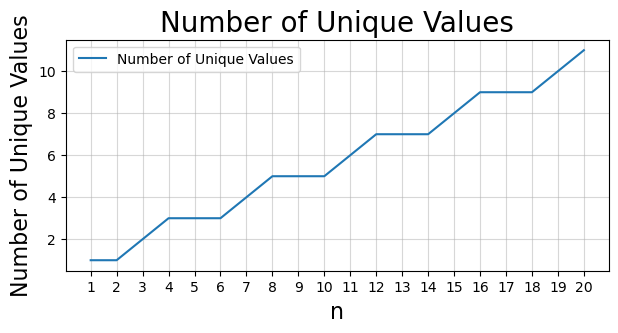

In [94]:
# Function to find unique solutions
def hatLeng(n):
    trials = 10 * (n ** 2)
    arr = np.linspace(1, n, n)
    retArr = set()
    for _ in range(trials):
        temp = int(hatNum(arr))
        retArr.add(temp)
        if len(retArr) >= ((n/2) + 1):
            break
    return len(retArr)

def plotHat(n):
    yArr = np.zeros(n)
    xArr = np.linspace(1, n, n)
    for i in range(n):
        yArr[i] = hatLeng(i + 1)
    return xArr, yArr

xArray, yArray = plotHat(20)

# Plotting graphs
plt.figure(figsize=(7, 3))
plt.plot(xArray, yArray, label = 'Number of Unique Values')

# Graph settings
plt.title("Number of Unique Values", fontsize=20)
plt.xlabel("n", fontsize=16)
plt.xticks(range(1,21))
plt.ylabel("Number of Unique Values", fontsize=16)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.savefig("graph.png")

In [86]:
# Function to find unique solutions
def uniqHat2(n):
    arr = np.linspace(1, n, n)
    retArr = set()
    if n % 4 == 0:
        uniqVals = (n/2) + 1
    if n % 4 == 1:
        uniqVals = (n + 1)/2
    if n % 4 == 2:
        uniqVals = n / 2
    if n % 4 == 3:
        uniqVals = (n + 1) / 2
    while len(retArr) != uniqVals: 
        temp = int(hatNum(arr))
        retArr.add(temp)
    return sorted(retArr)

# Print results in a table with the number of unique values
def printTable2(n):
    print("  n  | Unique Final Values                                | # of Unique Values")
    print("-----|----------------------------------------------------|-------------------")
    for i in range(1, n + 1):
        uniArr = uniqHat2(i)
        numUni = len(uniArr)
        uniqVals = ", ".join(str(val) for val in uniArr)
        print(f" {i:2}  | {uniqVals:<80} | {numUni:10}")

# Print table for n from 1 to 100
printTable2(80)

  n  | Unique Final Values                                | # of Unique Values
-----|----------------------------------------------------|-------------------
  1  | 1                                                                                |          1
  2  | 1                                                                                |          1
  3  | 0, 2                                                                             |          2
  4  | 0, 2, 4                                                                          |          3
  5  | 1, 3, 5                                                                          |          3
  6  | 1, 3, 5                                                                          |          3
  7  | 0, 2, 4, 6                                                                       |          4
  8  | 0, 2, 4, 6, 8                                                                    |          5
  9  | 1, 3, 5, 7, 9              

In [ ]:
# Finding average value
def avgHat(x, arr):
    temp = 0
    for i in range(x):
        temp += hatNum(arr)
    print(temp/x)

avgArr = np.linspace(1, 2024, 2024)
avgHat(100, avgArr)
avgHat(1000, avgArr)

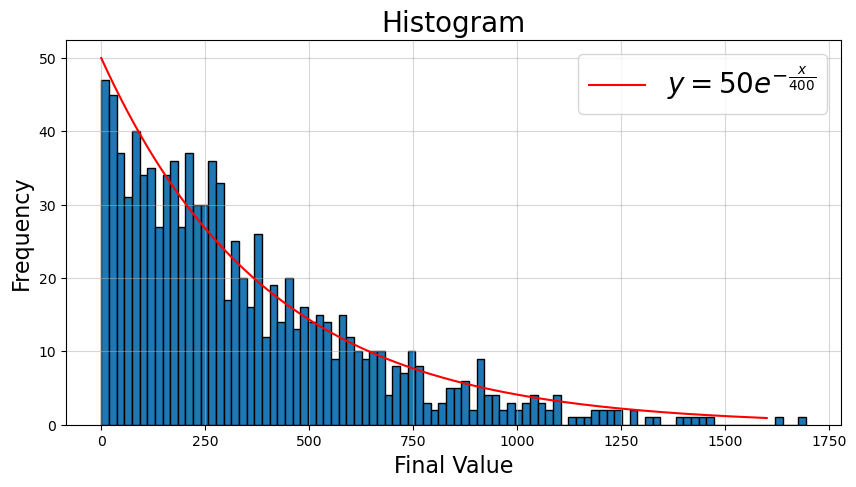

In [95]:
def xHist(x, n):
    arr = np.linspace(1, n, n)
    retArr = []
    for _ in range(x):
        temp = hatNum(arr)
        retArr.append(temp)
    return retArr

xArr = xHist(1000, 2024)

xE = np.linspace(0, 1600, 1000)
yE = 50* np.exp(-xE/400)

# Plotting a histogram
plt.figure(figsize=(10, 5))
plt.plot(xE, yE, label=r'$y = 50 e^{-\frac{x}{400}}$', linestyle='-', color='r')
plt.hist(xArr, bins = 92, edgecolor = 'k')

# Graph settings
plt.title('Histogram',fontsize=20)
plt.xlabel('Final Value',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.grid(True)
plt.legend(fontsize = 20)
plt.grid(True, alpha = 0.5)
plt.savefig("hist.png")

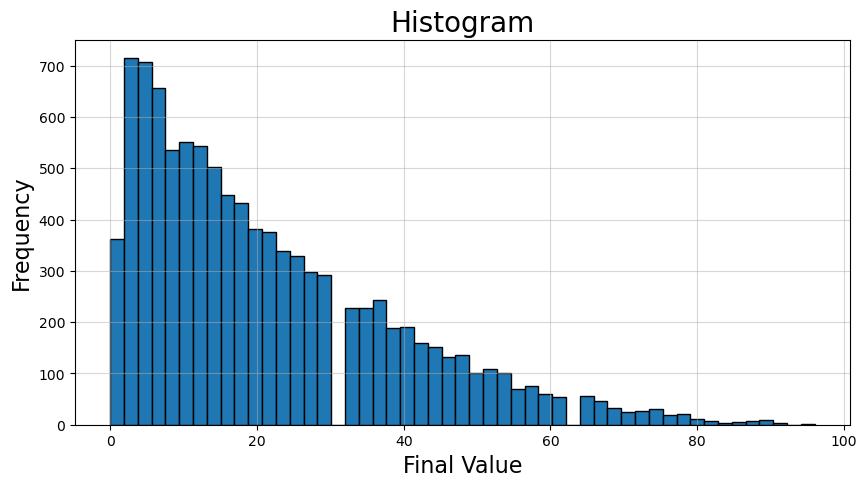

In [96]:
def xHist(x, n):
    arr = np.linspace(1, n, n)
    retArr = []
    for _ in range(x):
        temp = hatNum(arr)
        retArr.append(temp)
    return retArr

xArr = xHist(10000, 100)

xE = np.linspace(0, 1600, 1000)
yE = 50* np.exp(-xE/400)

# Plotting a histogram
plt.figure(figsize=(10, 5))
# plt.plot(xE, yE, label=r'$y = 50 e^{-\frac{x}{400}}$', linestyle='-', color='r')
plt.hist(xArr, bins = 51, edgecolor = 'k')

# Graph settings
plt.title('Histogram',fontsize=20)
plt.xlabel('Final Value',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.grid(True)
# plt.legend(fontsize = 20)
plt.grid(True, alpha = 0.5)
plt.savefig("hist2.png")

In [127]:
# Extention
normal = np.arange(1, 11)
extend = np.arange(11, 21)
extend2 = np.arange(21, 31)
extend3 = np.arange(31, 41)
extend4 = np.arange(41, 51)
extend5 = np.arange(51, 61)

print(normal)
avgHat(10000, normal)
print(extend)
avgHat(10000, extend)
print(extend2)
avgHat(10000, extend2)
print(extend3)
avgHat(10000, extend3)
print(extend4)
avgHat(10000, extend4)
print(extend5)
avgHat(10000, extend5)

[ 1  2  3  4  5  6  7  8  9 10]
2.966
[11 12 13 14 15 16 17 18 19 20]
5.57
[21 22 23 24 25 26 27 28 29 30]
5.7916
[31 32 33 34 35 36 37 38 39 40]
5.8838
[41 42 43 44 45 46 47 48 49 50]
5.781
[51 52 53 54 55 56 57 58 59 60]
5.8286


In [139]:
# Function to find unique solutions
def uniqHat3(arr):
    trials = len(arr) ** 4
    retArr = set()
    for _ in range(trials):
        temp = int(hatNum(arr))
        retArr.add(temp)
    return sorted(retArr)

# Extention
print(uniqHat3(normal))
print(uniqHat3(extend))
print(uniqHat3(extend2))
print(uniqHat3(extend3))
print(uniqHat3(extend4))
print(uniqHat3(extend5))

[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


In [161]:
# Defining our hat value finding function
def hatNum2(arr):
    hLen = len(arr)
    while hLen > 1:
        num1, num2 = randNum(hLen)
        hatDif = arr[num1] - arr[num2]
        arr = np.delete(arr, [num1, num2])
        arr = np.append(arr, hatDif)
        hLen = len(arr)
    return arr[0]

# Testing using array [1, ..., 2024]
hatArr = np.linspace(1, 2024, 2024)

for _ in range(30):
    print(hatNum2(hatArr))

# Finding average value
def avgHat2(x, arr):
    temp = 0
    for i in range(x):
        temp += hatNum2(arr)
    print(temp/x)

print("")
avgArr = np.linspace(1, 2024, 2024)
avgHat2(100, avgArr)
avgHat2(1000, avgArr)

-55168.0
-5244.0
-36764.0
5480.0
-45394.0
20806.0
-7258.0
-6442.0
57504.0
-57296.0
-46194.0
-30126.0
18510.0
22.0
-3786.0
-27832.0
46862.0
94100.0
-47792.0
17296.0
-7086.0
66486.0
-26452.0
7876.0
3796.0
34460.0
16110.0
21482.0
2430.0
4370.0

2285.54
-1006.51
